# 파이썬 OpenCV를 이용한 영상처리_허진경
* Jupyter Notebook Info
>- Dayoung Yun
>- 2021/11/19

## 3장 이미지변환
### 기하변환
#### 변환
##### 변환의 종류
>- 유사변환 : 물체의 크기는 변하지만, 각도는 보존 , 크기변환
>- 강체변환 : 크기 및 각도가 보존, 이동,  회전
>- 아핀변환 : 선의 수평성 유지, 선형, 이동 
>- 원근법변환 : 가까이 있는 물체는 크게, 멀리 있는 물체는 작게
>- 푸리에변환 : 주파수를 이용한 변환

##### 기준좌표 설정 방법
>- 좌측 위를 원점으로 한 경우와 중앙을 원점으로 하는 경우

### 크기변환
#### 크기변환
>- 이미지의 크기 변환
>- 입력화상의 좌표는 출력화상의 새로운 좌표에 매핑
>- (x,y) -> x 방향으로 a 배, y 방향으로 b배

In [1]:
import numpy as np

# 화소 하나하나를 다 옮겨줘야겠지?
def scale_nogood(img, scale_x = 1, scale_y = 1):
    height, width = img.shape
    height_n, width_n = int(height * scale_y), int(width*scale_x)
    img_ = np.zeros((height_n, width_n), dtype = np.uint8)
    
    for y in range(height):
        for x in range(width):
            img_[int(y*scale_y), int(x*scale_x)] = img[y,x]
            
    return img_

In [2]:
import cv2


img = cv2.imread('lena.jpeg', cv2.IMREAD_GRAYSCALE)

result = scale_nogood(img, 0.5, 0.5)

cv2.imshow('Origin', img)
cv2.imshow('Scale NG', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
result = scale_nogood(img, 1.5, 1.0)

cv2.imshow('Origin', img)
cv2.imshow('Scale NG', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 출력 영상을 기준으로 처리
>- 역변환 공식 필요
>- 변환 값이 정수가 아닐 경우 찾을 수 없으므로 int형변환 필요

In [4]:
import numpy as np

def scale_nogood2(img, scale_x =1, scale_y = 1):
    height, width = img.shape
    height_n, width_n = int(height * scale_y), int(width * scale_x)
    img_ = np.zeros((height_n, width_n), dtype = np.uint8)
    for y in range(height_n):
        for x in range(width_n):
            img_[y,x] = img[int(y/scale_y), int(x/scale_x)]
    return img_

In [5]:
import cv2

img = cv2.imread('lena.jpeg', cv2.IMREAD_GRAYSCALE)

result2 = scale_nogood2(img, 1.5, 1.0)

cv2.imshow('Origin', img)
cv2.imshow('Scale NG', result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 보간법
>- 원본 이미지에서 가져와야 할 화소의 좌표가 정수가 아닌 실수로 계산되는 경우 변환 후 화소의 값을 지정할 방법

##### 최근방법
>- 가장 가까운 좌표의 값을 이용해서 지정하는 방법
>- 이미지를 확대하는 비율으 클수록 계단현상이 더 많이 보이는 단점

In [6]:
import numpy as np

def scale_nearest(img, scale_x = 1, scale_y = 1):
    height, width = img.shape
    img_ = np.zeros((int(height * scale_y), int(width*scale_x)), dtype = np.uint8)
    for y in range(int(height * scale_y)):
        for x in range(int(width * scale_x)):
            try : 
                img_[y,x] = img[round(y/scale_y), round(x/scale_x)]
            except:
                pass
    return img_

In [7]:
import cv2

lena_roi = cv2.imread('lena.jpeg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Lena Roi',lena_roi)
cv2.imshow('Scale Nearest', scale_nearest(lena_roi, 3, 3))
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 선형방법
>- 원본 영상에서 인접한 네개의 화소와 소수점 이하를 가중치로 사용하여 실수 좌표상의 화소값을 계산하는 방법

In [8]:
import numpy as np

def scale_bilinear(img, scale_x = 1, scale_y = 1):
    height, width = img.shape
    img_ = np.zeros((int(height * scale_y), int(width * scale_x)), dtype = np.uint8)
    
    for y in range(int(height * scale_y)):
        for x in range(int(width * scale_x)):
            q = x/scale_x - int(x/scale_x)
            p = y/scale_y - int(y/scale_y)
            
            try:
                X = int(x/scale_x)
                Y = int(y/scale_y)
                value = (1-p) * (1-q) * img[Y,X] + p*(1-q)*img[Y+1,X]+(1-p)*q*img[Y,X+1] + p*q*img[Y+1, X+1]
                if value > 255:
                    img_[y,x] = 255
                else:
                    img_[y,x] = int(value)
            except:
                pass
    return img_
                

In [9]:
import cv2

lena_roi = cv2.imread('lena.jpeg',cv2.IMREAD_GRAYSCALE)

cv2.imshow('lena', lena_roi)
cv2.imshow('Scale Nearest', scale_bilinear(lena_roi, 3, 3))
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Max Pooling
>- 이미지의 크기를 줄이는 과정에서 줄여야할 대상 영역의 화소중에서 어떤 화소의 값을 줄여지는 이미지의 화소로 선택할지 결정
>- Max Pooling :  대상 화소 중에서 가장 큰 화소 값을 선택
>- Mean Pooling : 대상 화소의 평균값을 선택
>- Min Pooling :  가장 작은 값을 선택

In [12]:
import numpy as np

def maxpool2d(img):
    height, width = img.shape
    img_ = np.zeros((int(height/2), int(width/2)), dtype = np.uint8)
    
    for y in range(int(height/2)):
        for x in range(int(width/2)):
            try:
                img_[y,x] = np.max(img[2 * y : 2*y+2, 2*x:2*x+2])
            except:
                pass
    return img_

In [13]:
import cv2

img = cv2.imread('lena.jpeg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Nearest 0.5', scale_nearest(img, 0.5, 0.5))
cv2.imshow('Max Pooling', maxpool2d(img))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
import cv2

img = cv2.imread('lena.jpeg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Nearest 0.5', scale_nearest(img, 0.5, 0.5))
cv2.imshow('Max Pooling', maxpool2d(img))
cv2.waitKey(0)
cv2.destroyAllWindows()

#### cv2.resize(img, dsize, fx, fy, interpolation)
>- 이미지의 크기 변경
>- INTER_AREA : 크기 줄일 때 주로 사용
>- INTER_LINEAR, INTER_CUBIC : 크기를 키울 때 주로 사용

In [2]:
import cv2
img = cv2.imread('Tori.jpeg')
img

array([[[236, 240, 255],
        [117, 122, 155],
        [111, 120, 158],
        ...,
        [  9,   5,   4],
        [  4,   0,   0],
        [255, 254, 255]],

       [[236, 240, 255],
        [116, 121, 152],
        [111, 120, 157],
        ...,
        [  9,   5,   4],
        [  4,   0,   0],
        [255, 254, 255]],

       [[235, 241, 255],
        [116, 123, 150],
        [110, 121, 153],
        ...,
        [ 10,   5,   4],
        [  5,   0,   0],
        [255, 254, 255]],

       ...,

       [[255, 255, 240],
        [ 29,  24,   9],
        [ 51,  44,  29],
        ...,
        [116,  97,  94],
        [121, 104, 101],
        [255, 249, 247]],

       [[254, 252, 242],
        [ 48,  46,  36],
        [  5,   3,   0],
        ...,
        [ 97,  92,  91],
        [116, 111, 110],
        [237, 233, 232]],

       [[255, 255, 251],
        [213, 210, 205],
        [254, 251, 246],
        ...,
        [253, 253, 253],
        [212, 212, 212],
        [255, 255, 255]]

In [4]:
cv2.imwrite('resize-5to100_nearest.png', cv2.resize(img, dsize = (100,100), interpolation = cv2.INTER_NEAREST))

True

In [5]:
cv2.imwrite('resize-5to100_linear.png', cv2.resize(img, dsize = (100,100), interpolation = cv2.INTER_LINEAR))

True

In [8]:
cv2.imwrite('resize-5to100_linear_exact.png', cv2.resize(img, dsize = (100,100), interpolation = cv2.INTER_LINEAR_EXACT))

True

In [9]:
cv2.imwrite('resize-5to100_area.png', cv2.resize(img, dsize = (100,100), interpolation = cv2.INTER_AREA))

True

In [10]:
cv2.imwrite('resize-5to100_cubic.png', cv2.resize(img, dsize = (100,100), interpolation = cv2.INTER_CUBIC))

True

In [12]:
cv2.imwrite('resize-5to100_lanczos4.png', cv2.resize(img, dsize = (100,100), interpolation = cv2.INTER_LANCZOS4))

True

In [13]:
cv2.imwrite('resize-5to100_nearest.png', cv2.resize(img, dsize = (50,50), interpolation = cv2.INTER_NEAREST))

True

In [14]:
cv2.imwrite('resize-5to100_linear.png', cv2.resize(img, dsize = (50,50), interpolation = cv2.INTER_LINEAR))

True

In [15]:
cv2.imwrite('resize-5to100_area.png', cv2.resize(img, dsize = (50,50), interpolation = cv2.INTER_AREA))

True

In [16]:
cv2.imwrite('resize-5to100_cubic.png', cv2.resize(img, dsize = (50,50), interpolation = cv2.INTER_CUBIC))

True

In [17]:
cv2.imwrite('resize-5to100_lanczos4.png', cv2.resize(img, dsize = (50,50), interpolation = cv2.INTER_LANCZOS4))

True

### 이동
>- 이미지의 위치를 변경하는 변환
>- 이미지의 위치를 변환하기 위해 변환될 좌표를 원본 좌표에 이동량을 더한 좌표의 화소로 매핑

In [18]:
import numpy as np

def translate(img, dist = (0,0)):
    height, width = img.shape[:2]
    img_ = np.zeros(img.shape, dtype = np.uint8)
    for y in range(height):
        for x in range(width):
            X = x - dist[0]
            Y = y - dist[1]
            
            if (X < 0) | (X >=width) | (Y <0) | (Y >=height):
                continue
            img_[Y,X] = img[y,x]
    return img_

In [19]:
import cv2

img = cv2.imread('lena.jpeg')

cv2.imshow('Origin',img)
cv2.imshow('Translate', translate(img, (100, 50)))
cv2.waitKey()
cv2.destroyAllWindows()

### 회전
>- 이미지를 특정 위치를 기준으로 회전시키는 것
>- 각도가 양수이면 시계반대방향으로 회전

In [26]:
import numpy as np

def rotate(img, deg = 30):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype = np.uint8)
    theta = np.pi / (180.0 /deg)
    center_x = int(width/2)
    center_y = int(height/2)
    
    for y in range(height):
        for x in range(width):
            X = int(x - center_x) * np.cos(theta) + (y - center_y)*np.sin(theta) + center_x
            Y = int(-(x - center_x) * np.sin(theta) + (y - center_y)*np.cos(theta)) + center_y
            if (X < 0) | (X >=width) | (Y <0) | (Y >=height):
                continue
            img_[Y,X] = img[y,x]
    return img_

In [27]:
import cv2

img = cv2.imread('lena.jpeg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Origin', img)
cv2.imshow('Rotate', rotate(img))
cv2.waitKey()
cv2.destroyAllWindows()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### 아핀변환
#### 아핀변환
>- 이동, 확대/축소, 반전까지 포함된 변환
>- 선의 평행성은 유지가 되면서 이미지를 변환하는 작업
>- 변환행렬을 이용해서 이동, 회전등의 변환을 수행하면 더빠르게 변환된 이미지를 얻을 수 있음

#### 변환행렬
>- 3개이 일치가 되는 점이 있으면 변환행렬을 구할 수 있음
>- cv2.getRotationMatrix2D(center, angle, scale)-> M : 중심점, 회전각도, 크기배율을 이용하여 변환행렬 생성
>- cv2.getAffineTransform(src, dst) ->M : 3점의 위치를 이용해서 3점 쌍에 대한 변환행렬 생성

#### cv2.warpAffine(src, M, dsize) ->dst
>- 변환 행렬을 적용한 배열을 반환

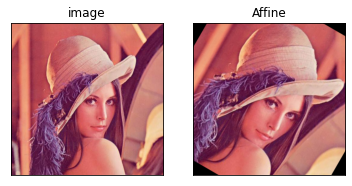

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('lena.jpg')
rows, cols, ch = img.shape

M = cv2.getRotationMatrix2D((rows/2, cols/2), -30, 1.2)

dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Affine'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
M

array([[   1.03923048,   -0.6       ,  143.55699596],
       [   0.6       ,    1.03923048, -163.64300404]])

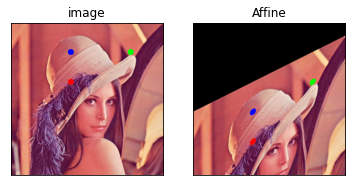

In [15]:
img = cv2.imread('lena.jpg')
rows, cols, ch = img.shape

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

cv2.circle(img, (200,100), 10, (255, 0, 0), -1)
cv2.circle(img, (400,100), 10, (0, 255, 0), -1)
cv2.circle(img, (200,200), 10, (0, 0, 255), -1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Affine'), plt.xticks([]), plt.yticks([])
plt.show()

### 원근법 변환
#### 원근법 변환
>- 직선의 성질만 유지가 되고, 선의 평행성은 유지가 되지 않는 변환

#### 변환 행렬
>- cv2.getPersperctiveTransform(scr, dst)

#### cv2.warpPerspective(src, M, dsize, flags) -> dst

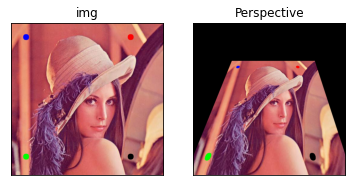

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg')

pts1 = np.float32([[50,50], [50,450], [400,50], [400, 450]])
pts2 = np.float32([[150,150], [50,450], [350,150], [400, 450]])

cv2.circle(img, (50,50), 10, (255, 0,0), -1)
cv2.circle(img, (50,450), 10, (0, 255,0), -1)
cv2.circle(img, (400,50), 10, (0, 0,255), -1)
cv2.circle(img, (400,450), 10, (0, 0,0), -1)

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (512,512))

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('img'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Perspective'), plt.xticks([]), plt.yticks([])

plt.show()

### 푸리에 변환
>- 주변 픽셀과의 밝기 변화가 많은 곳은 고주파로, 밝기 변화가 적은 곳은 저주파로 표현 가능
>- 이미지에서 고주파 : 경계선, 저주파 : 배경
#### 푸리에 변환
>- 시간 도메인(x축)에서 표현된 신호를 주파수 도메인으로 변환하는 것
>- 시간 축이 제거되어 대상의 전체적인 특징을 파악 할 수 있음
>- 중심이 저주파 영역, 주변이 고주파 영역을 나타냄
>- 푸리에 변환 후 중심의 저주파 제거 -> 다시 이미지 전환 -> 이미지 경계선만 남게됨
>- 푸리에 변환 후 주변의 고주파 제거 -> 경계선 사라짐 -> 모아레 패턴을 제거하는 용도로 사용

#### 넘파이를 이용한 푸리에 변환
>- 왼쪽 상단(0,0)을 중심으로 이동, 로그스케일링을 하여 분석이 용이한 값으로 변환
>- fft2() : 2차원 이산 푸리에 변환 계산
>- FFT를 사용하여 M차원 배열의 모든 축에 대해 n차원 이산 푸리에 변환을 계산
>- numpy.fft.fft2(a, s = None, axes=(-2,1), norm = None) ->out
>- numpy.fft.fftshif(x, axis = None)->y : 제로 주파수 성분을 중심으로 이동

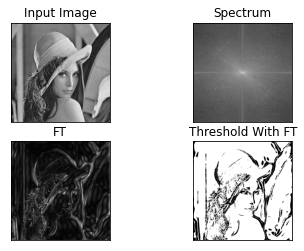

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지에 푸리에 변환 적용
f = np.fft.fft2(img)

# 분석을 쉽게 하기 위해 주파수가 0인 부분을 중앙에 위치
# 중앙에 저주파가 모이게 됨

fshift = np.fft.fftshift(f)

# spectrum을 구하는 수학식
magnitude_spectrum = 20 * np.log(np.abs(fshift))

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2) # 이미지 중심 좌표

# 중앙에서 10X10 사이즈의 사각형의 값을 1로 설정
# 중앙의 저주파를 모두 제거
# 저주파를 제거하였기 때문에 배경이 사라지고 경계선만 남게됨

d = 10

fshift[crow-d:crow+d, ccol-d : ccol+d] = 1

# 푸리에 변환 결과를 다시 이미지로 변환
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# threshold를 적용하기 위해 float 타입을 int 타입으로 변환

img_new = np.uint8(img_back)
_, thresh = cv2.threshold(img_new, 30 ,255, cv2.THRESH_BINARY_INV)

plt.subplot(221), plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Spectrum')
plt.xticks([]), plt.yticks([])

plt.subplot(223)
plt.imshow(img_back, cmap = 'gray')
plt.title('FT')
plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(thresh, cmap = 'gray')
plt.title('Threshold With FT')
plt.xticks([]), plt.yticks([])
plt.show()

### OpenCV를 이용한 푸리에 변환
>- cv2.dft(scr, dst, flags) -> dst : 1D 또는 2D 배열의 이산 푸리에 변환을 계산
>- numpy.fft.fftshift(x, axis = None)-> y : 제로 주파수 성분을 스펙트럼 중심으로 이동
>- cv2.magnitye(x,y) -> magnitude


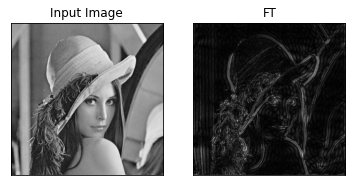

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2. imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)
dft_magni = cv2.magnitude(dft_shift[:, :,0], dft_shift[:, :, 1])
magnitude_spectrum = 20 * np.log(dft_magni)

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

d = 20
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-d:crow+d , ccol-d:ccol+d] = 0

fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(img_back, cmap = 'gray')
plt.title('FT')
plt.xticks([]), plt.yticks([])
plt.show()

### 문서 스캔하기
>- v2.getPerspectiveTransform()
>- cv2.sarpPerspective()
>- 이벤트 키 c가 눌려지면 그 순간의 화면을 캡쳐하고 그 화면에서 마우스로 원근법 변환을 수행할 4개의 점을 마킹

In [33]:
import cv2
import numpy as np
from datetime import datetime
from time import sleep

points = np.zeros((4,2), dtype = np.float32)
count = 0

def mouseHandler(event, x, y , flags, param):
    global count
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 5, (0,0,255),-1)
        cv2.imshow('Capture', img)
        try:
            points[count] = [x,y]
            count +=1
            if count == 4:
                sum_ = points.sum(axis = 1)
                diff = np.diff(points, axis = 1)
                
                top_left = points[np.argmin(sum_)]
                bottom_right = points[np.argmax(sum_)]
                top_right = points[np.argmin(diff)]
                bottom_left = points[np.argmax(diff)]
                
                pts1 = np.float32([top_left, top_rigjt, bottom_right, bottom_left])
                width_bottom = abs(bottom_right[0] - bottom_left[0])
                width_top = abs(top_right[0] - top_left[0])
                height_right = abs(top_right[1] - bottom_right[1])
                height_left = abs(top_left[1] - bottom_left[1])
                
                width = max([width_bottom, width_top])
                height = max([height_right, height_left])
                
                pts2 = np.float32([[0,0], [width-1,0],[width-1, height-1],[0, height-1]])
                
                M = cv2.getPerspectiveTransform(pts1, pts2)
                
                dst = cv2.warpPerspective(img, M, (width, height))
                cv2.imshow('Capture', img)
                cv2.imshow('Scanned', dst)
                
        except:
            pass
    cap = cv2.VideoCapture(0)
    captured = False
    
    if cap.isOpened():
        delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
        while True:
            ret, img = cap.read()
            if ret:
                cv2.imshow('Capture', img)
                key = cv2.waitKey(delay)
                if key & 0xFF == 27:
                    print('아무 작업도 하지 않고 종료함')
                    break
                elif key == ord('c'):
                    captured = True
                    break
                else:
                    print(ret, img)
                    break
                    
                    
    else:
        print('File not opened')
    
    if captured:
        cap.release()
        while True:
            cv2.imshow('Capture', img)
            cv2.setMouseCallback('Capture', mouseHandler)
            key = cv2.waitKey(delay)
            if key & 0xFF == 27:
                print('ESC Key pressed')
                break
    cap.release()
    cv2.destroyAllWindows()